In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import tensorflow as tf
from tensorflow import keras

In [9]:
train_dir = r'D:\Mango Classifications\Dataset\Classification_dataset\train'
test_dir = r'D:\Mango Classifications\Dataset\Classification_dataset\test'
validation_dir = r'D:\Mango Classifications\Dataset\Classification_dataset\validation'

## Data Preprocessing

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=45.0,
    zoom_range=[0.5, 1.5],
)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=45.0,
    zoom_range=[0.5, 1.5],
)

''' 
Data preprocessing and obtaining data generators

'''
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 880 images belonging to 8 classes.
Found 480 images belonging to 8 classes.


## Transfer Learning

In [6]:
from tensorflow.keras.applications import VGG16

In [7]:
conv_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(150,150,3),
)

In [8]:
from keras import layers,models

In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(8,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 16,862,536
Trainable params: 16,862,536
No

In [11]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.Adam(learning_rate=2e-5),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Mango_classification(VGG16).h5",save_best_only=True)

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=44,
    epochs=20,
    validation_data = validation_generator,
    validation_steps=24,
    callbacks = [checkpoint_cb]
)

Epoch 1/20
44/44 [==============================] - 188s 4s/step - loss: 2.0327 - accuracy: 0.1989 - val_loss: 1.9732 - val_accuracy: 0.2458
Epoch 2/20
44/44 [==============================] - 188s 4s/step - loss: 1.7358 - accuracy: 0.3352 - val_loss: 1.5899 - val_accuracy: 0.3313
Epoch 3/20
44/44 [==============================] - 187s 4s/step - loss: 0.9812 - accuracy: 0.6580 - val_loss: 1.3500 - val_accuracy: 0.5688
Epoch 4/20
44/44 [==============================] - 189s 4s/step - loss: 0.4496 - accuracy: 0.8648 - val_loss: 0.7273 - val_accuracy: 0.7521
Epoch 5/20
44/44 [==============================] - 190s 4s/step - loss: 0.3155 - accuracy: 0.8909 - val_loss: 0.7189 - val_accuracy: 0.7563
Epoch 6/20
44/44 [==============================] - 190s 4s/step - loss: 0.1713 - accuracy: 0.9534 - val_loss: 0.7462 - val_accuracy: 0.7812
Epoch 7/20
44/44 [==============================] - 189s 4s/step - loss: 0.1793 - accuracy: 0.9364 - val_loss: 0.5382 - val_accuracy: 0.8146
Epoch 8/20
44

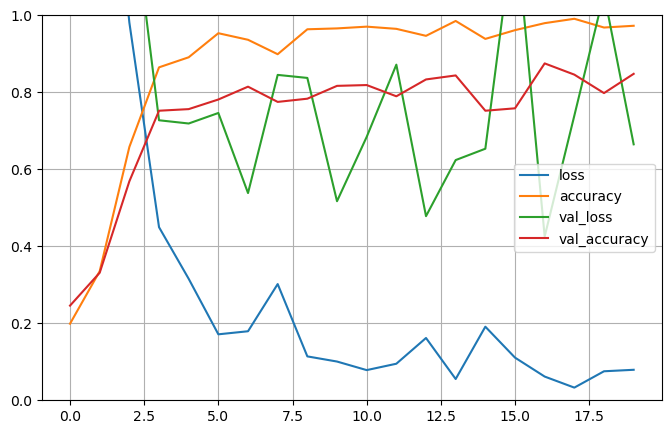

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [3]:
model1 = keras.models.load_model('Mango_classification(VGG16).h5')

In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size =(150,150),
    batch_size=20,
    class_mode='categorical',
    shuffle = False
)

NameError: name 'test_datagen' is not defined

In [8]:
model1.evaluate(test_generator,steps=12)

12/12 [==============================] - 14s 1s/step - loss: 0.0796 - accuracy: 0.9792


[0.07960785925388336, 0.9791666865348816]

In [9]:
predictions = model1.predict(test_generator)

12/12 [==============================] - 12s 926ms/step


In [10]:
predicted_classes = np.argmax(predictions,axis=1)

In [11]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6,
       6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7],
      dtype=int64)

In [12]:
true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())

In [13]:
class_names

['Anwar Ratool',
 'Chaunsa (Black)',
 'Chaunsa (Summer Bahisht)',
 'Chaunsa (White)',
 'Dosehri',
 'Fajri',
 'Langra',
 'Sindhri']

In [4]:
from tensorflow.keras.preprocessing import image
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

In [5]:
# Function to handle the uploaded image and make predictions
def handle_upload(change):
    uploaded_image = change['owner'].data[-1]
    img = Image.open(io.BytesIO(uploaded_image))
    img = img.resize((150, 150))  # Resize the image to match the expected input shape
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make the prediction
    prediction = model1.predict(img_array)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class = class_names[predicted_class_index]

    # Display the uploaded image and predicted class
    display(img)
    print("Predicted class:", predicted_class)

In [6]:
# Create a file upload button
upload_button = widgets.FileUpload()

# Register the upload button to handle changes
upload_button.observe(handle_upload, names='value')

# Display the upload button
display(upload_button)

FileUpload(value={}, description='Upload')

1/1 [==============================] - 0s 318ms/step


NameError: name 'class_names' is not defined